# 3.3 Write your own neuron 

In this section, we will customize our own neuron computation

## Example by spikingjelly

In the documenet by spikingjelly, they provides the square integrate and fire neuron:

$ v(t) = v(t-1) + x^2$

They define ``SquareIFNode`` (inherting `BasedNode`)

In [1]:
import torch
from spikingjelly.activation_based import neuron

class SquareIFNode(neuron.BaseNode):
    def neuronal_charge(self, x: torch.Tensor):
        self.v = self.v + x ** 2

Now, we can perform an operation of this neuron

In [3]:
sif_layer = SquareIFNode()

T = 4
N = 1
x_seq = torch.rand([T, N])
print(f'x_seq={x_seq}')

for t in range(T):
    yt = sif_layer(x_seq[t])
    print(f'sif_layer.v[{t}]={sif_layer.v}')

sif_layer.reset()
sif_layer.step_mode = 'm'
y_seq = sif_layer(x_seq)
print(f'y_seq={y_seq}')
sif_layer.reset()

x_seq=tensor([[0.0338],
        [0.6321],
        [0.1228],
        [0.1050]])
sif_layer.v[0]=tensor([0.0011])
sif_layer.v[1]=tensor([0.4007])
sif_layer.v[2]=tensor([0.4158])
sif_layer.v[3]=tensor([0.4268])
y_seq=tensor([[0.],
        [0.],
        [0.],
        [0.]])


## Our version

Now, let's write our simplified LIF neuron:

Charging

$ v(t) = v(t-1) + x - \lambda$



In [27]:
import torch
from spikingjelly.activation_based import neuron, surrogate
from typing import Callable

class OurLIFNode(neuron.BaseNode):
    def __init__(self, leak: float = 0.01, v_threshold: float = 1.,
                 v_reset: float = 0., surrogate_function: Callable = surrogate.Sigmoid(),
                 detach_reset: bool = False, step_mode='s', backend='torch', store_v_seq: bool = False):

        assert isinstance(leak, float) and leak > 0.

        super().__init__(v_threshold, v_reset, surrogate_function, detach_reset, step_mode, backend, store_v_seq)

        self.leak = leak
    def neuronal_charge(self, x: torch.Tensor):
        self.v = self.v + x - self.leak

In [29]:
lif_layer = OurLIFNode(leak=0.1)

T = 10
N = 1
x_seq = torch.rand(T)
print(x_seq)


v_list = []
s_list = []

for t in range(T):
    yt = lif_layer(x_seq[t])
    s_list.append(yt)
    v_list.append(lif_layer.v)

print(v_list)

tensor([0.3833, 0.4532, 0.2228, 0.7832, 0.7914, 0.7090, 0.5250, 0.6628, 0.0726,
        0.8921])
[tensor(0.2833), tensor(0.6365), tensor(0.7593), tensor(0.), tensor(0.6914), tensor(0.), tensor(0.4250), tensor(0.9878), tensor(0.9604), tensor(0.)]


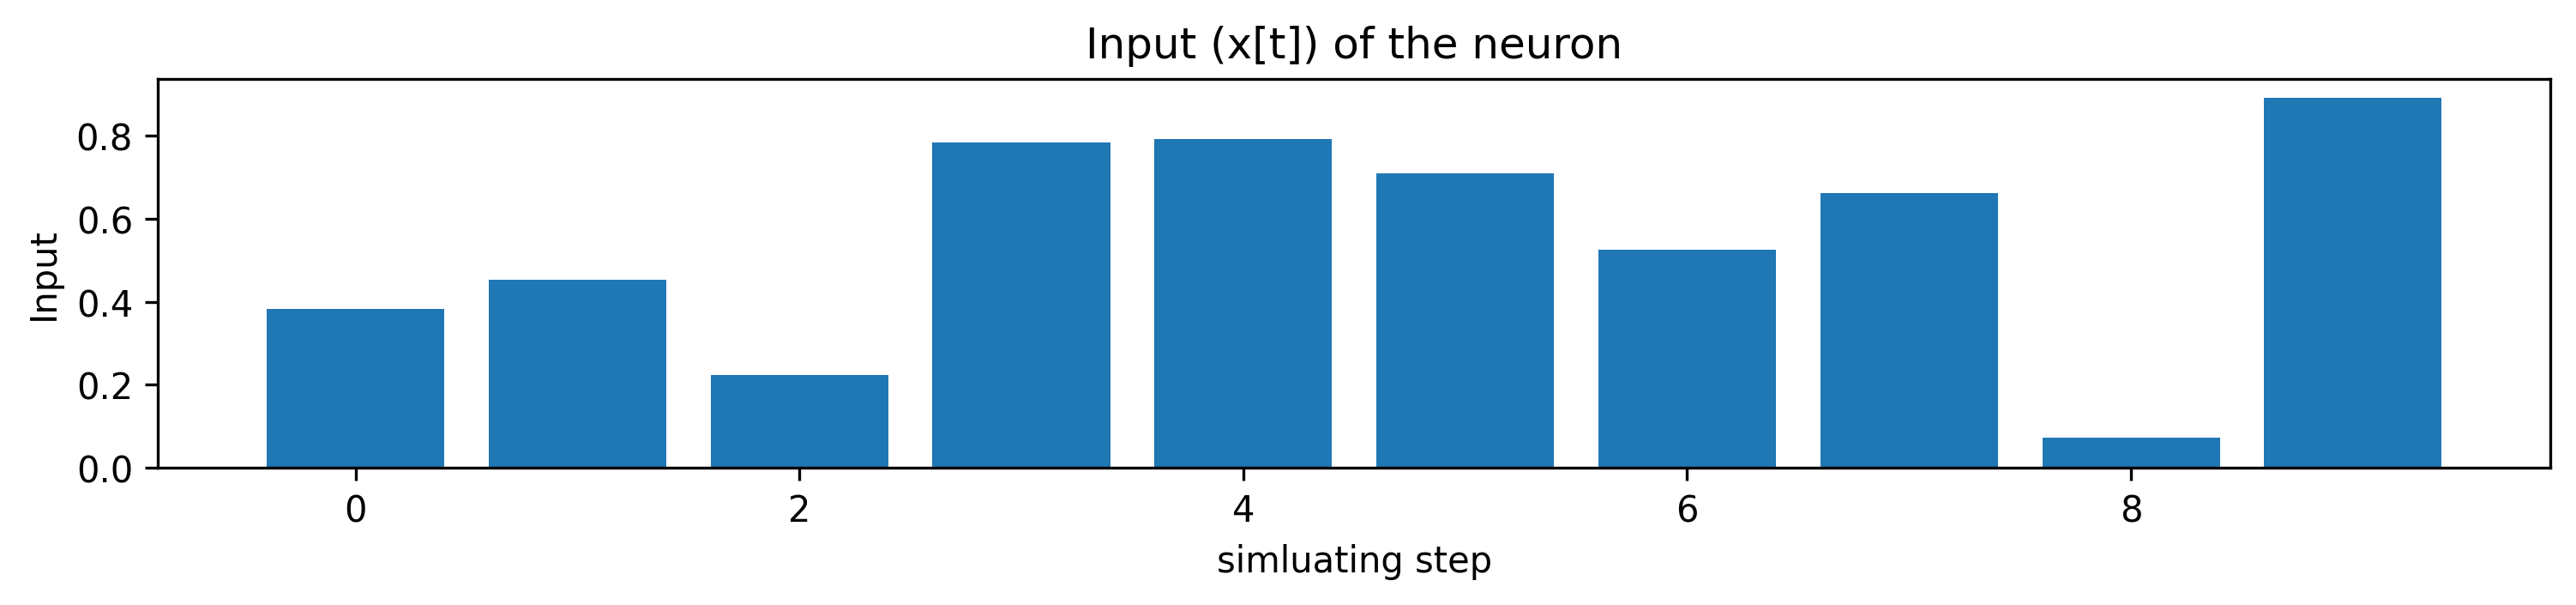

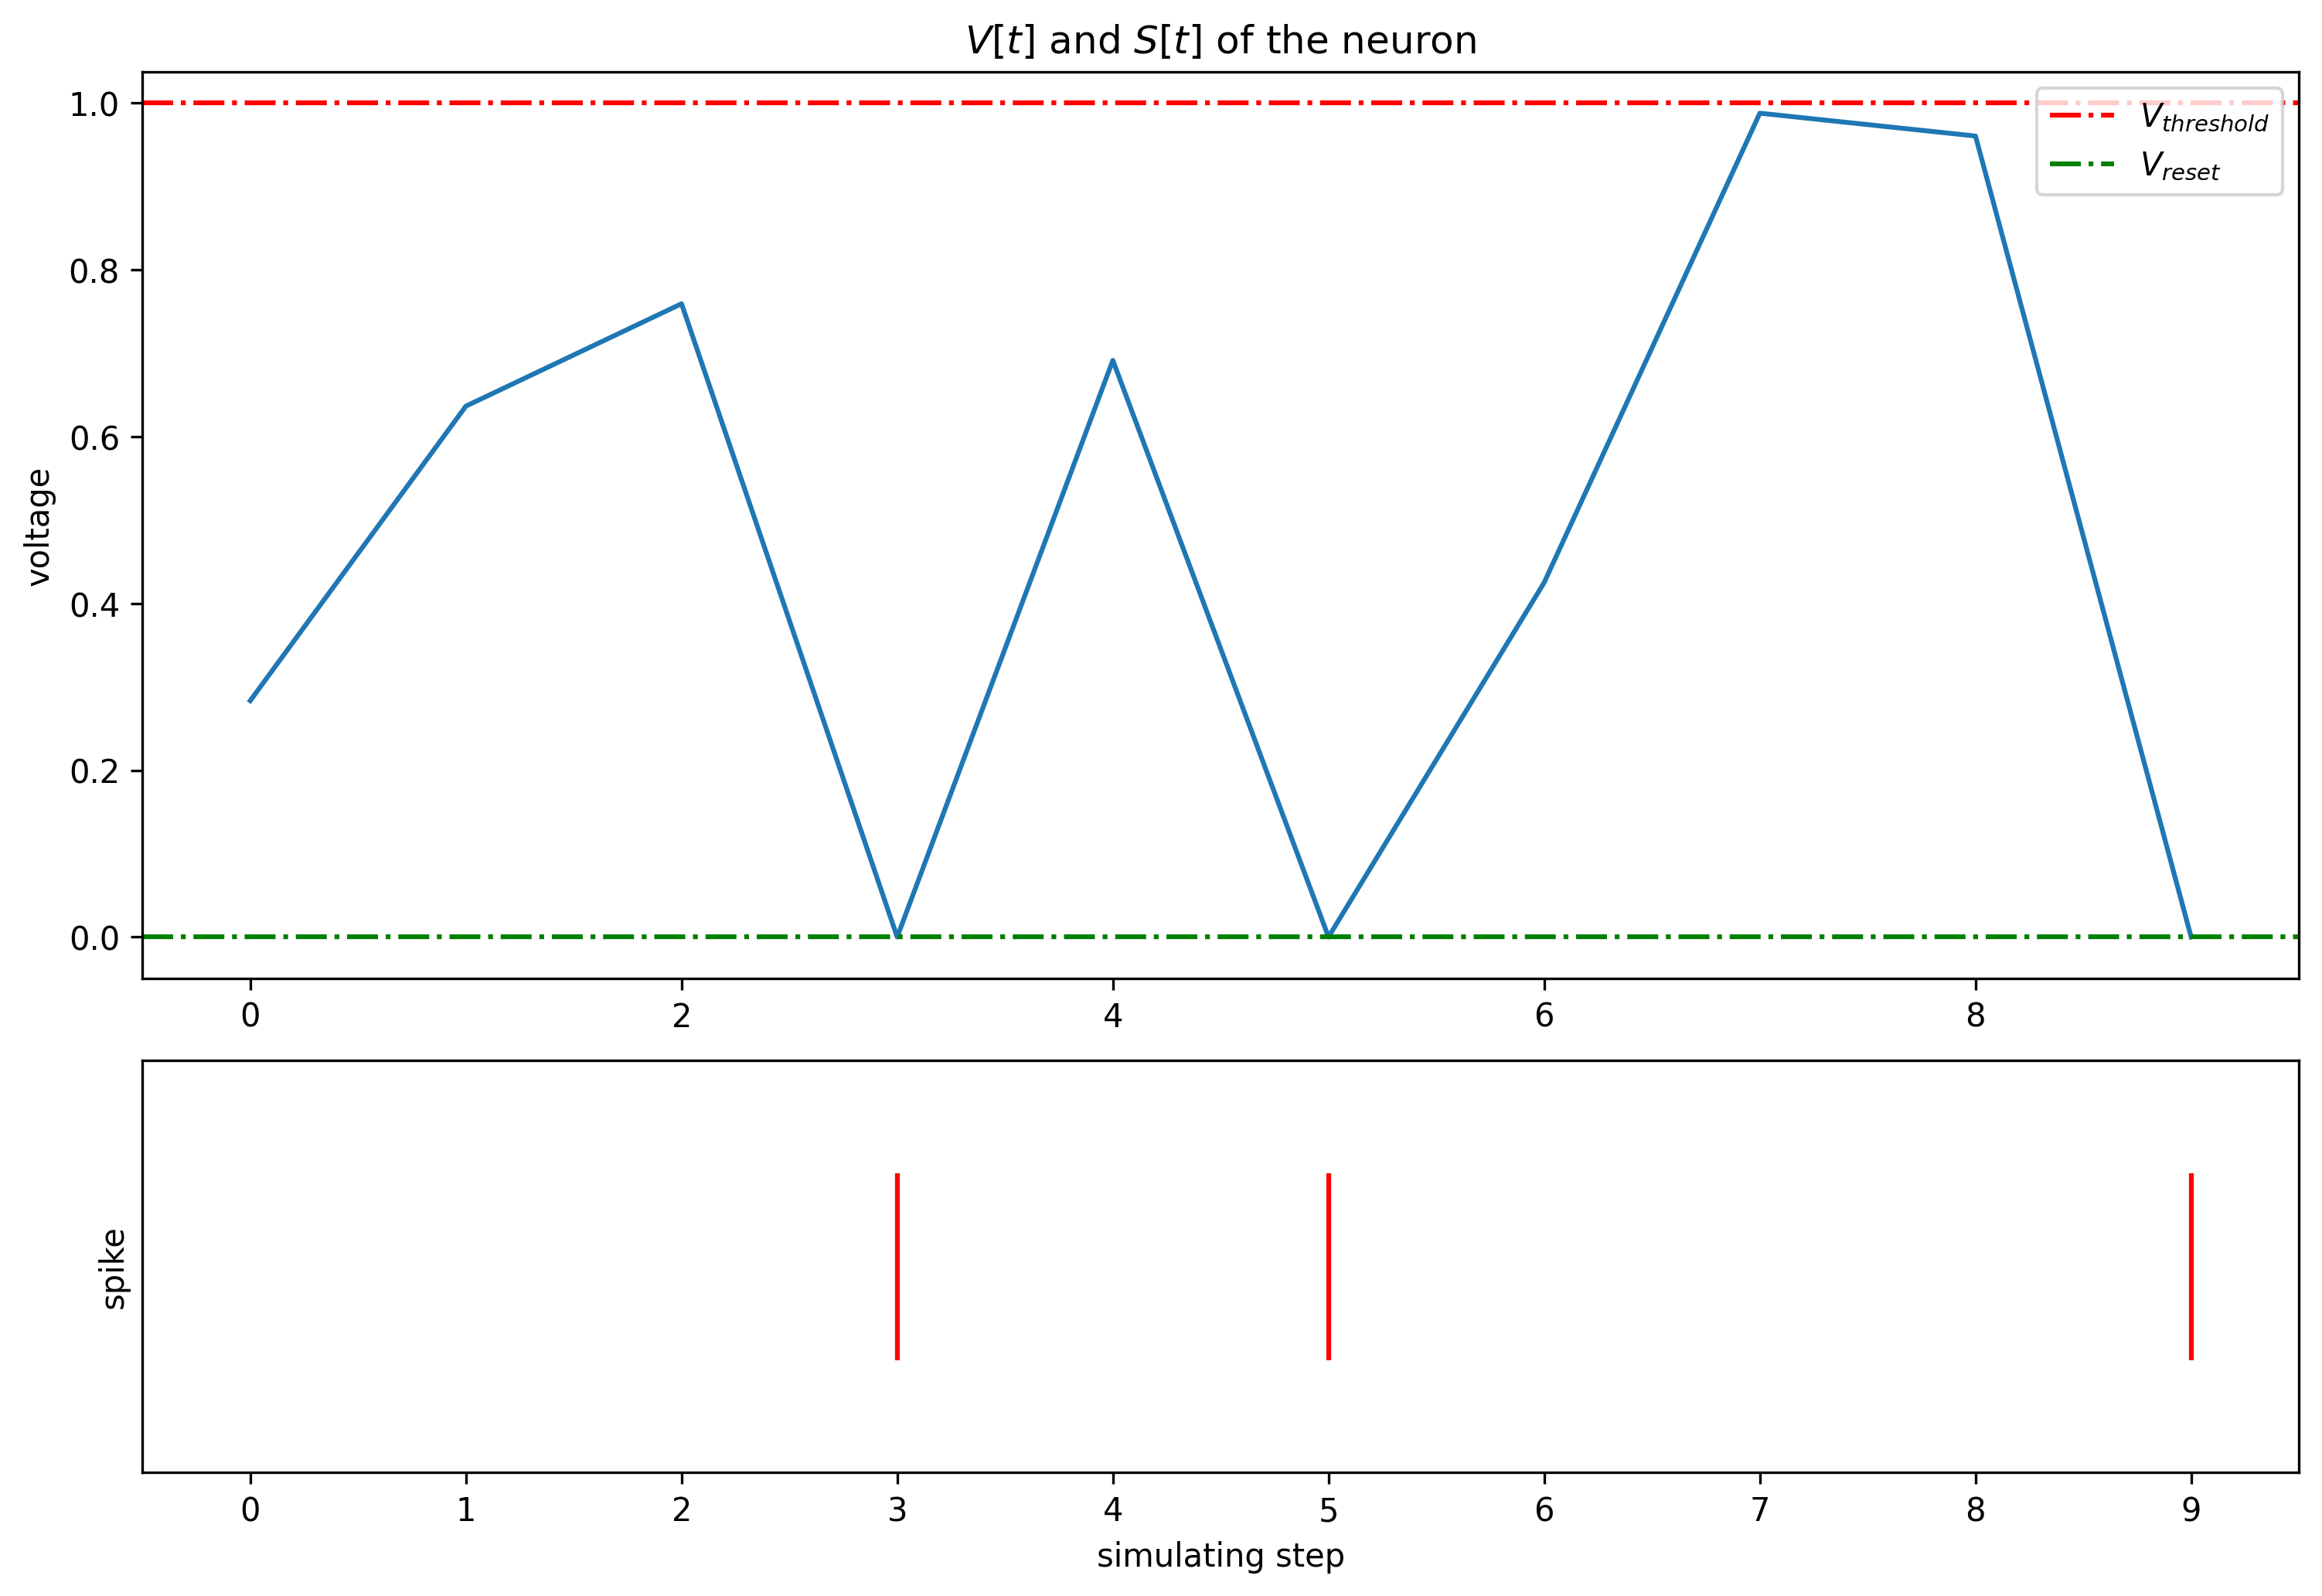

In [30]:
from matplotlib import pyplot as plt
from spikingjelly import visualizing

dpi = 300
figsize = (12, 8)


import numpy as np
fig, ax = plt.subplots(figsize=(12, 2), dpi=dpi)
tx = np.arange(0, T)
ax.bar(tx, x_seq)
ax.set_title("Input (x[t]) of the neuron")
ax.set_ylabel('Input')
ax.set_xlabel('simluating step')
plt.show()

visualizing.plot_one_neuron_v_s(
    torch.stack(v_list).numpy(), 
    torch.stack(s_list).numpy(), 
    v_threshold=lif_layer.v_threshold,
                                v_reset=lif_layer.v_reset,
                                figsize=figsize, dpi=dpi)
plt.show()